### NYU Computational Physics 2019: Homework 3

Problems 7.2 and 7.9 from Newman textbook

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("dark")
#sns.set()
sns.set(style='ticks', palette='colorblind', font='sans-serif', font_scale=1.2)
#sns.set_style("ticks")

In [118]:
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)


# def dft(y):
#     N = len(y)
#     c = np.zeros(N//2+1, complex)
#     for k in range(N //2+1):
#         for n in range(N):
#             c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
#     return c

In [119]:
sun_data = np.loadtxt("data/sunspots.txt")

In [120]:
fourier = DFT_slow(sun_data[:,1])
#fourier2 = dft(sun_data[:,1])
#fourier2 = np.fft.fft(sun_data[:,1])

In [190]:
N_samples = fourier.shape[0]

#### 7.2 a)  Plot the sunspot count as a function of months. Mark off the length of one cycle.

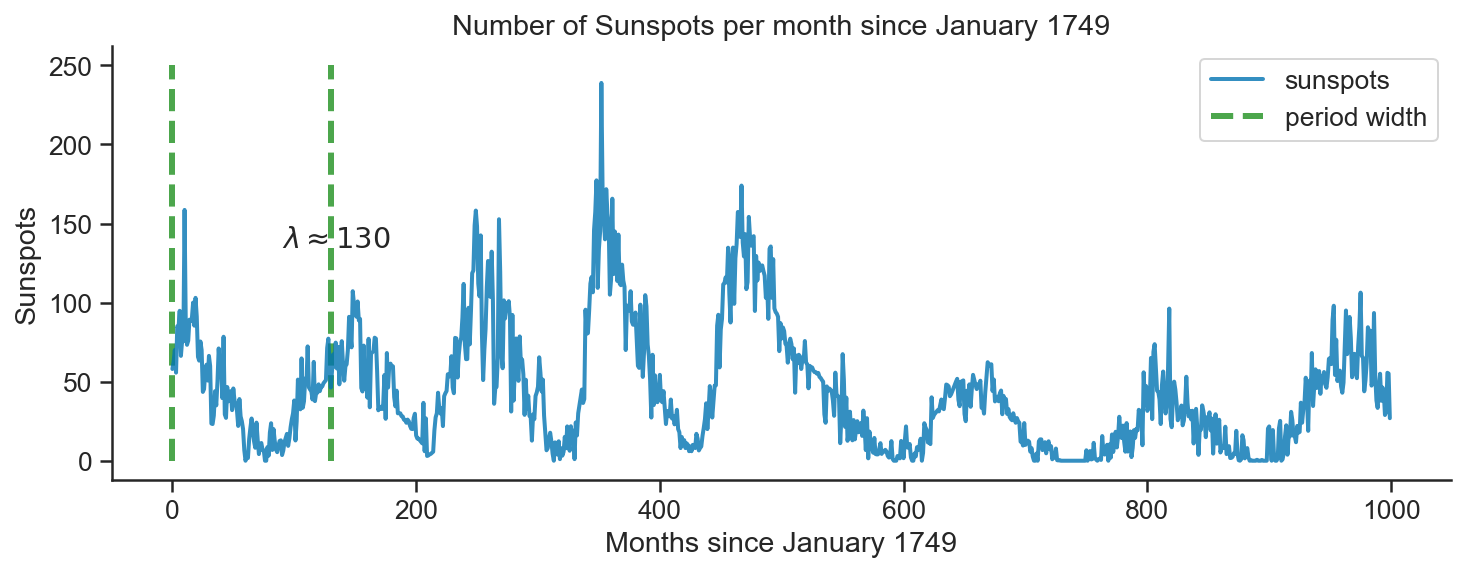

In [188]:
fig = plt.figure(figsize=(12,4))
plt.plot(sun_data[:1000,0], sun_data[:1000,1], label = 'sunspots', linewidth = 2, alpha =0.8)
plt.vlines([0,130], 0, 250, color = 'green', linewidth = 3, alpha = 0.7, label = 'period width', linestyle = "--")
#plt.axvline(0, 0,250, color = 'red')
sns.despine()
plt.xlabel("Months since January 1749")
plt.ylabel("Sunspots")
plt.title("Number of Sunspots per month since January 1749")
plt.text(x = 90, y = 135, s=r"$\lambda \approx 130$")
plt.legend(loc='best')
plt.show()
#plt.plot(sun_data[:,0], fourier)

The length of the cycle seems to be around 130 months. 

#### 7.2 b)  Calculate the Fourier coefficients, and plot $|c_k|^2$ as a function of k. 

k at first peak in $|c_k|^2$ at k = 24


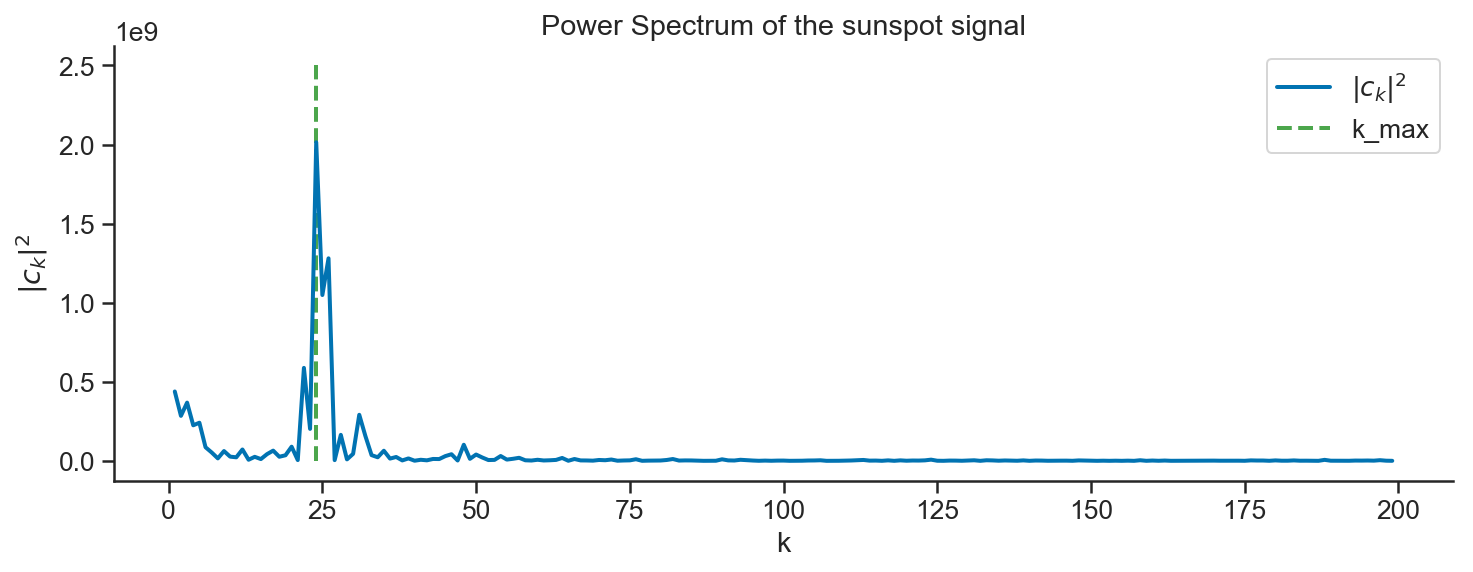

In [187]:
fig = plt.figure(figsize=(12,4))

ck2 = abs(fourier[1:200])**2
k_max = np.argmax(abs(fourier[1:200])**2) + 1
print(r"k at first peak in $|c_k|^2$ at k =", k_max)
plt.plot(sun_data[1:200,0], ck2, label = r"$|c_k|^2$", linewidth = 2)
plt.vlines(k_max, 0, 2.5e9, color = 'green', linewidth = 2, alpha = 0.7, label = 'k_max', linestyle = "--")
plt.xlabel("k")
plt.ylabel(r"$|c_k|^2$")
plt.title("Power Spectrum of the sunspot signal")
plt.legend(loc='best')
sns.despine()

#### 7.2 c)  Find the approximate argmax of the the power spectrum and calculate the period of the sine wave with that value of $k$.

The argmax (k corresponding to the peak) of the power spectrum is $k=24$. The period of the sinewave of associated with the coefficient is $b = \frac{2*\pi * k }{N}$ for $\sin(bx)$ is given by 
$$ T = \frac{2\pi}{b} = \frac{2\pi}{2 \pi \frac{k}{N}} = \frac{N}{k}$$

In [198]:
fourier_period_estimate = N_samples / k_max

print("Period of sine wave oscillation given by the fourier coefficients:", fourier_period_estimate)

Period of sine wave oscillation given by the fourier coefficients: 130.95833333333334


The estimate is $\approx$ 130.958 months.



----------

#### 7.7 a) Compute the FFT of the pitch.txt dataset

In [213]:
pitch_data = np.loadtxt("data/pitch.txt")
print(pitch_data.shape)

(1024,)


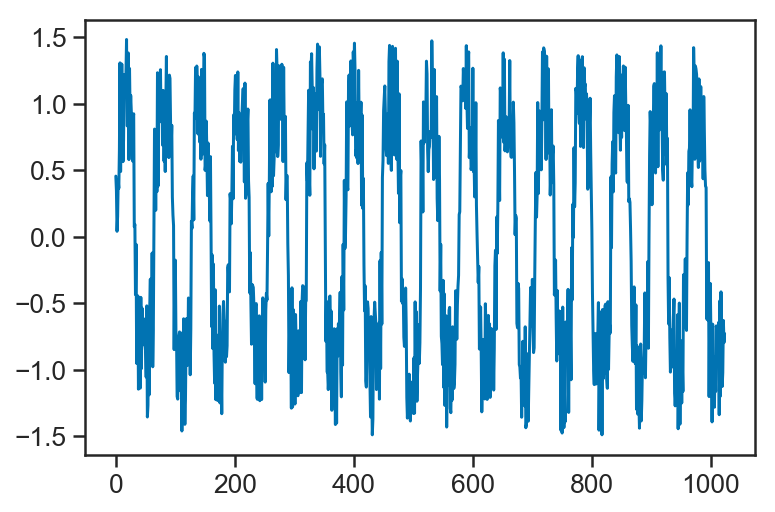

In [210]:
plt.plot((np.arange(pitch_data.shape[0])), pitch_data)

In [211]:
pitch_fft = np.fft.fft(pitch_data)

/Users/michaelalbergo/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


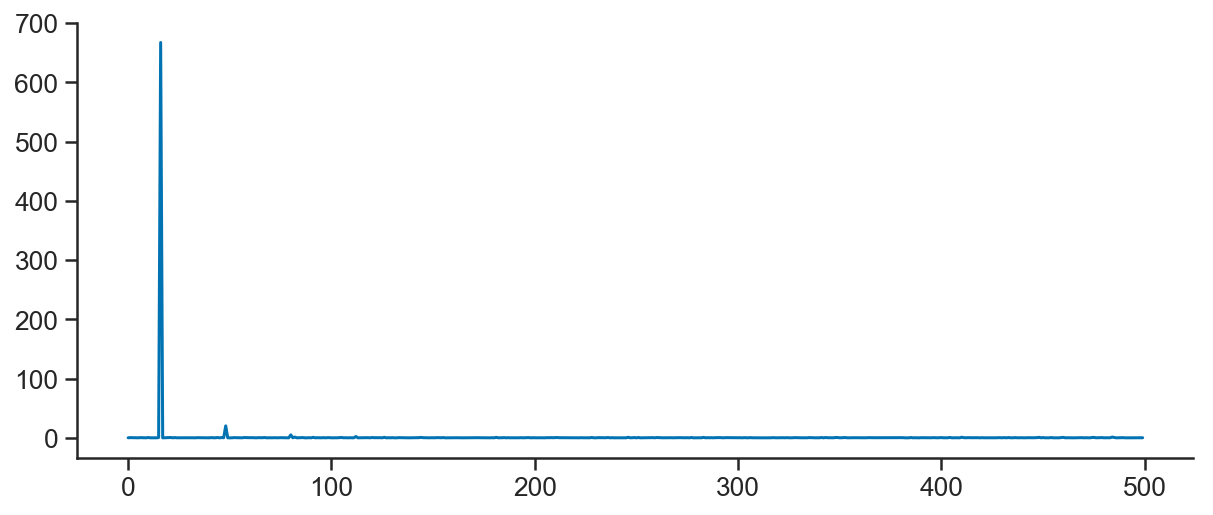

In [228]:
fig = plt.figure(figsize=(10,4))
plt.plot(np.arange(pitch_fft.shape[0])[:500], np.multiply(pitch_fft,np.conj(pitch_fft))[:500] / 500)
sns.despine()